In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
import pandas as pd
import geopandas as gpd
import matplotlib 
import mplleaflet
data = pd.read_csv('activity_names.csv')
locations = pd.read_csv('Subway Entrances.csv')
data['Stop Name'] = data['Stop Name'].apply(lambda x: x.lower())
locations['Stop Name'] = locations['Stop Name'].apply(lambda x: x.lower())
data = data.loc[:,'Stop Name':'DAILY_ENTRIES']
entries = data.groupby(['Stop Name'],  as_index=False).sum()
entries = entries[entries.columns[::-1]]
entries = entries.merge(locations, on = ['Stop Name'])
stops = entries[entries['ENTRIES'].notnull()]
stops.to_csv('Subway Entrances1.csv')

In [12]:
top_stations = pd.read_csv('Final_Scores_With_Gender.csv')
locations = pd.read_csv('Subway Entrances.csv')
top_stations = top_stations[top_stations.columns[::-1]]
top_stations.rename(columns = {'Subway_Station':'Stop Name'}, inplace = True)
top_stations = top_stations.merge(locations, on = ['Stop Name'])
top_stations.to_csv('SubwayScore.csv')

In [17]:

census = gpd.read_file('2010gendercensus.geojson')
entrances = gpd.read_file('Subway Entrances.geojson')
companies = gpd.read_file('companies.geojson')
starbs = gpd.read_file('final_subway_starbucks.geojson')
scored = gpd.read_file('SubwayScore.geojson')
scored.head()


,FIELD1,Final_Score,Gender Percent (%),Strbks Distance Score Percent (%),Tech Company Percent (%),MTA Score Percent (%),Stop Name,Unnamed: 0_x,Unnamed: 0_y,Unnamed: 0.1,...,Unnamed: 0.1.1.1.1.1,Station ID,Complex ID,GTFS Stop ID,Division,Line,Borough,Daytime Routes,Structure,geometry
0,0,75.170105,25.018381,78.772617,55.670240,100.000000,Times Sq - 42 St,0,10,10,...,10,11,611,R16,BMT,Broadway - Brighton,M,N Q R W,Subway,POINT (-73.986754 40.754672)
1,1,75.170105,25.018381,78.772617,55.670240,100.000000,Times Sq - 42 St,0,318,318,...,318,317,611,127,IRT,Broadway - 7Av,M,1 2 3,Subway,POINT (-73.987495 40.75529)
2,2,75.170105,25.018381,78.772617,55.670240,100.000000,Times Sq - 42 St,0,469,469,...,469,467,611,725,IRT,Flushing,M,7,Subway,POINT (-73.987691 40.755477)
3,3,75.170105,25.018381,78.772617,55.670240,100.000000,Times Sq - 42 St,0,470,470,...,470,468,611,902,IRT,Lexington - Shuttle,M,S,Subway,POINT (-73.98622900000002 40.755983)
4,4,60.359572,89.901583,77.566706,30.560302,52.320407,59 St - Columbus Circle,3,160,160,...,160,161,614,A24,IND,8th Av - Fulton St,M,A B C D,Subway,POINT (-73.981736 40.768296)


/Users/chelan/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


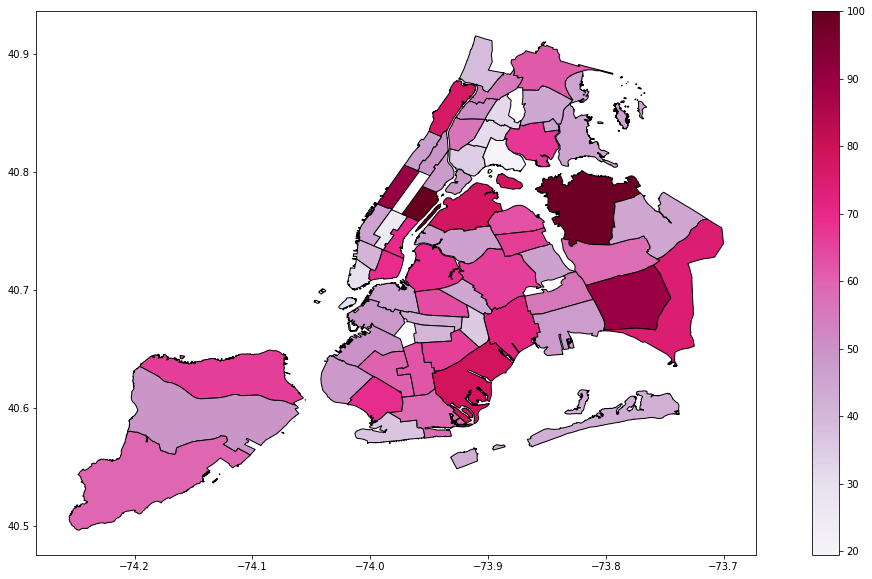

In [14]:
base = census.plot(column = '% of Max', colormap = "PuRd", edgecolor='black', legend = "True")
base.figure.savefig('census_plot.png')

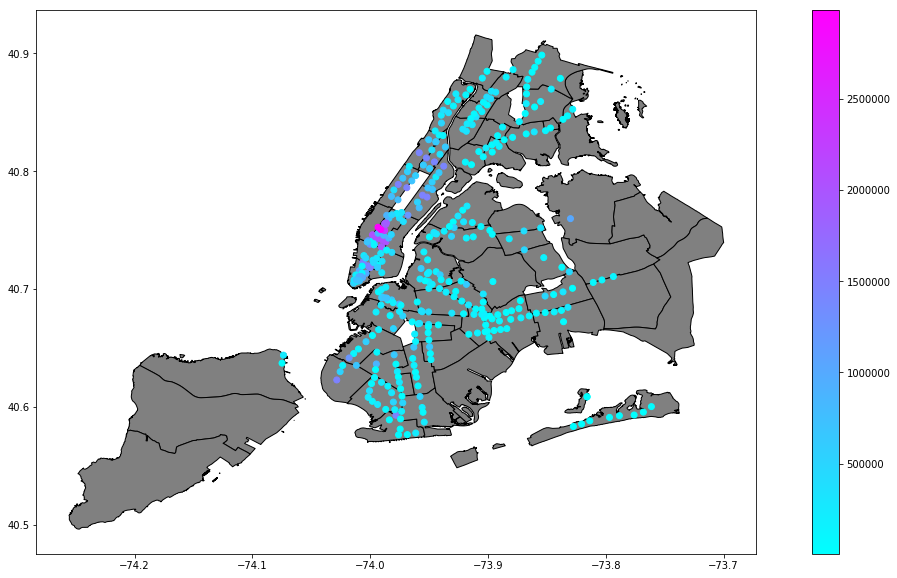

In [15]:
geobase = census.plot(color = 'grey', edgecolor='black')
map1 = entrances.plot(ax = geobase, column = 'DAILY_ENTRIES', cmap = 'cool', legend = 'True')
map1.figure.savefig('subway_plot.png')

In [8]:
geobase = census.plot(color = 'grey', edgecolor='black')
#map2 = companies.plot(ax = geobase, marker='o', color='#94d032', markersize=75)
map2 = starbs.plot(ax = geobase, marker='o', color='#db5296', markersize=75)
mplleaflet.show(fig=map2.figure, crs=census.crs, tiles='cartodb_positron')

In [25]:
geobase = census.plot(color = 'grey', edgecolor='black')
map3 = scored.plot(ax = geobase, column = 'Final_Score', marker='*',cmap = 'gist_heat',
                   markersize=500, alpha = 0.6, legend = 'True')
mplleaflet.show(fig=map3.figure, crs=census.crs, tiles='cartodb_positron')